### Práctica #1 Regresión Simple con Python

**Estudiante** Richard Douglas Grijalba

**Practica #1 Modelos Regresion Lineal con Python**

**Modalidad Virtual - Grow Up Analytics**

En esta práctia se realizará una predicción sobre los ingreso por ventas, para lo cual se recibe la información de ventas por medio de comunicación, por lo tanto se deb elegir una variable y realizar una regresión Simple Lienal.

* Realice la carga de los paquetes necesarios para realizar el análisis
* Cargue el conjunto de datos y realice la exploración de la información
* Ejecute el análisi exploratorio (visualizar la distribución del conjunto de datos, explorar relación de Sales contra las otras variables)
* Matriz de Correlación
* Elija ua variable X según la correlación obtenida 
* Separar el conunto de atos e train y test
* Crear el modelo de regresion lineal
* Evaluar el resultado del modelo al menos con 3 diferentes métodos para validar la precisión algoritmica, explicar los resultados


**El dataset se compone :**
 Tres medios de comunicación, TV , Radio , Periodico, y se desea determinar cual es la insidencia de estos sobre las Ventas.
 
 Por lo tanto se procede a realizar un modelo de regresión lineal para dicho motivo.

In [1]:
# importar algunas librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import csv
df = pd.read_csv('C:\\Users\\Rdouglas\\Documents\\Python Scripts\\curso Grow Up\\ML Modelos Regresion\\practicas\\Publicidad.csv')

df.head(3)

,Unnamed: 0,TV,Radio,Periodico,Ventas
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [3]:
# revisar las columnas 
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Periodico', 'Ventas'], dtype='object')

In [4]:
#quitar la columnas no necesaria

df = df.drop(['Unnamed: 0'],1)

In [5]:
df.head(3)

,TV,Radio,Periodico,Ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


**Revisión de los Datos**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Periodico  200 non-null    float64
 3   Ventas     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Dimensiones del dataset**

In [7]:
print("Numero de Filas:" +str(df.shape[0]))
print("Numero de Columnas:" +str(df.shape[1]))

Numero de Filas:200
Numero de Columnas:4


**Valores Nulos**

In [8]:
df.isnull().sum()

TV           0
Radio        0
Periodico    0
Ventas       0
dtype: int64

In [9]:
df.isna().sum()

TV           0
Radio        0
Periodico    0
Ventas       0
dtype: int64

**Exploración rápida de las Caracteristicas**

In [10]:
df.describe()

,TV,Radio,Periodico,Ventas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### EDA - Análisis Exploratorio de Datos

**1. TV**

*Medidas de Tendencia Central*

In [11]:
df['TV'].describe()  # se pueden observar las medidas de la caracteristica TV

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [12]:
df['TV'].mode()  # la caracteristica TV corresponde a tipo multi modal

0     17.2
1     76.4
2    109.8
3    177.0
4    184.9
5    197.6
6    199.8
7    222.4
8    237.4
9    240.1
Name: TV, dtype: float64

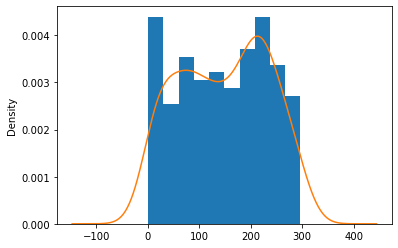

In [13]:
ax = df.TV.plot.hist(density=True)
df.TV.plot.density(ax=ax);

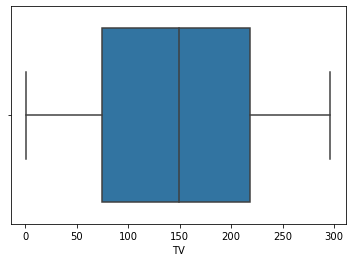

In [14]:
ax = sns.boxplot(x=df["TV"])  # no se observan valores outliers

**2.Radio**

*Medidas de Tendencia Central*

In [15]:
df['Radio'].describe()  #se muestr aque el valor promedio es de 23.26 , el valor maximo es de 49.6

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64

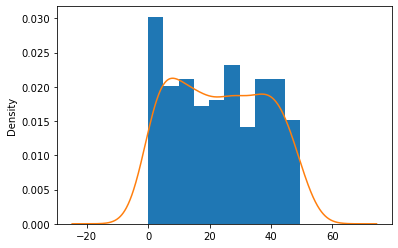

In [16]:
ax = df.Radio.plot.hist(density=True)   # se observa el comportamiento de los datos de la caracteristica
df.Radio.plot.density(ax=ax);

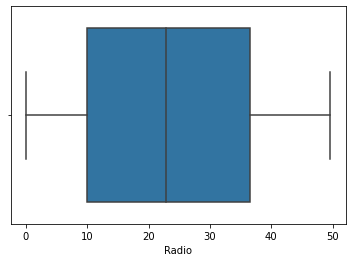

In [17]:
ax = sns.boxplot(x=df["Radio"])   # no se observan valores outliers

**3.Periodico**

*Medidas de Tendencia Central*

In [18]:
df['Periodico'].describe()  

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Periodico, dtype: float64

 el valor maximo es 14, el promedio es 30,  Q5 = indica que indica que el 50% de los datos presenta una valor menor o igual a 25.75

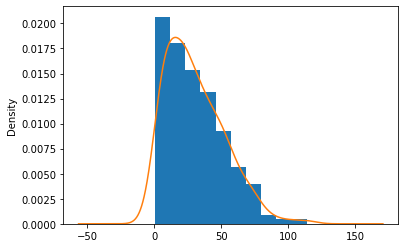

In [19]:
ax = df.Periodico.plot.hist(density=True)        # la distribucion de los datos d ela caracteristica periodico
df.Periodico.plot.density(ax=ax);

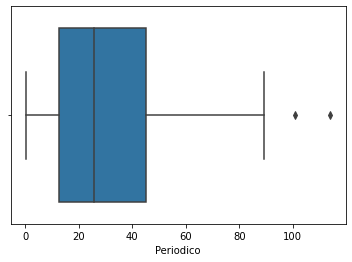

In [20]:
ax = sns.boxplot(x=df["Periodico"])  # se aprecian algunos valores atipicos en esta caracteristica

**4. Ventas**

*Medidas de Tendencia Central*

In [21]:
df['Ventas'].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Ventas, dtype: float64

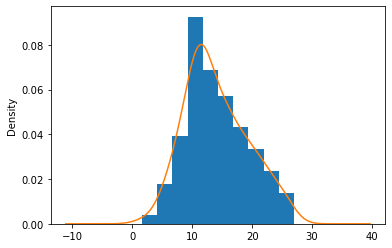

In [22]:
ax = df.Ventas.plot.hist(density=True)
df.Ventas.plot.density(ax=ax);

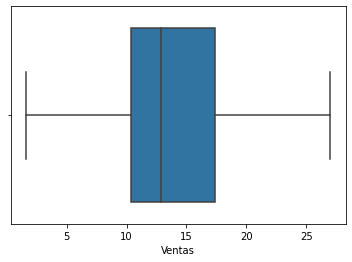

In [23]:
ax = sns.boxplot(x=df["Ventas"])

**Explorar la Relación de la variable sales con las demás variables**

In [24]:
df.columns

Index(['TV', 'Radio', 'Periodico', 'Ventas'], dtype='object')

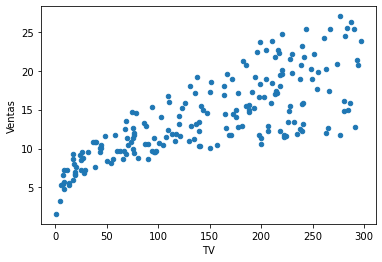

In [25]:
df.plot.scatter(x= 'TV', y='Ventas');

se muestra la relación entre la caracteristica TV y las ventas, según se muestra a un mayor gasto de pauta publicitaria en el medio de comunicación TV, refleja un mayor monto de Ventas.

**Por lo tanto se muestra una relación positiva, a mayor aumento de pauta en TV, aumentan las ventas**

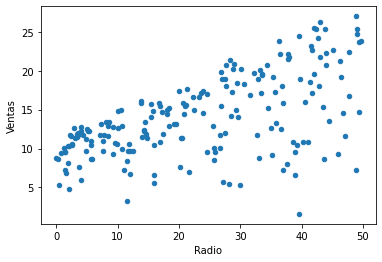

In [26]:
df.plot.scatter(x= 'Radio', y='Ventas');

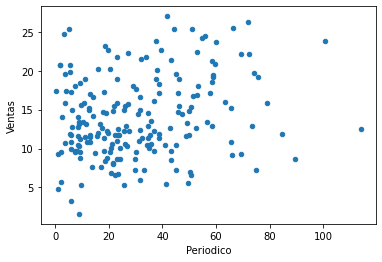

In [27]:
df.plot.scatter(x= 'Periodico', y='Ventas');

Este gráfico muestra que la relación entre ambos es bajo, por lo tanto un aumento en el gasto de pauta publicitaria en el periodico *-genera un posible aumento en las ventas-*

**Matriz de Correlación**

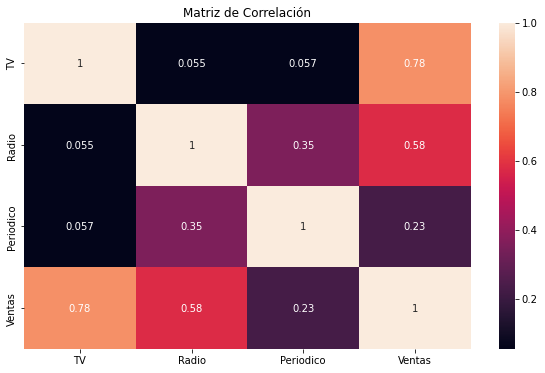

In [28]:
#creacion de la matriz de correlación

correlation_mat = df.corr()
plt.figure(figsize=(10,6))
plt.title("Matriz de Correlación")
sns.heatmap(correlation_mat, annot=True)
plt.show()


De la anterior matriz de correlación se muestra que **Ventas y TV** presentan la mayor correlación positiva de 0.78 fuerte-alta. mientras que la segunda correlación es **Radio y Ventas** es una correlación de 0.58 -alta- , mientras que la relación entre **Periodico y Ventas** presenta una correlación de 0.23 -baja-

### Elija ua variable X según la correlación obtenida 

en este caso se elije la variable TV.

    -Tv = variable X
    -Vetas= variable Y

Se procedió a elegir la caracteristica **TV** para predecir el monto de **ventas**, esto por la relación que muestran ambas caracteristicas, tal y como se muestra en el siguiente gráfico.

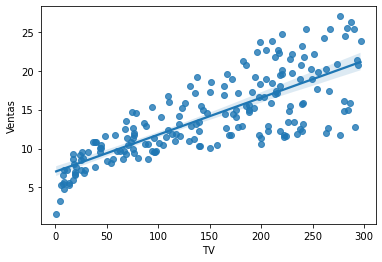

In [29]:
sns.regplot(df['TV'], df['Ventas']);

### **Modelo de Regresión Lineal**

In [30]:
#Importamos las librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [31]:
#Definimos la variable a predecir

y = df['Ventas'].values

v_predecir = y

print('Tipo de valor para Y:'+str(type(y))+'Dimensiones '+str(y.shape))

#Definimos las variables feature que seran utilziadas para predecir la presion
X=df['TV'].values

v_feature =X.reshape(-1,1)
#Consultamos las dimensiones de la variable feature, 

print('Tipo de valos para X: '+str(type(X))+'Dimensiones '+str(X.shape))

print('Tipo de valor para V_feature: '+str(type(v_feature))+' Dimensiones '+str(v_feature.shape))

print(v_predecir)


Tipo de valor para Y:<class 'numpy.ndarray'>Dimensiones (200,)
Tipo de valos para X: <class 'numpy.ndarray'>Dimensiones (200,)
Tipo de valor para V_feature: <class 'numpy.ndarray'> Dimensiones (200, 1)
[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6  8.6 17.4  9.2  9.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  12.5  5.6 15.5  9.7 12.  15.  15.9
 18.9 10.5 21.4 11.9  9.6 17.4  9.5 12.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 12.9  8.5 14.9 10.6 23.2 14.8  9.7 11.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 15.7 14.  18.   9.3  9.5 13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 12.3 11.3 13.6
 21.7 15.2 12.  16.  12.9 16.7 11.2  7.3 19.4 22.2 11.5 16.9 11.7 15.5
 25.4 17.2 11.7 23.8 14.8 14.7 20.7 19.2  7.2  8.7  5.3 19.8 13.4 21.8
 14.1 15.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  11.6 15.2 19.7 10.6
  6.6  8.8 24.7  9.7  1.6 12.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.
 15.6  3.2 15.3 10

In [32]:
#Instanciamos la regresión 
reg = LinearRegression()

#  Se debe crear los conjuntos de datos trainning y testing
#Importar librerias necesarias
from sklearn.model_selection import train_test_split

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmo. 
# test equivale a un 30% y el de trainning un 70%
X_train, X_test, y_train, y_test = train_test_split(v_feature, v_predecir, test_size=0.3)

#Entrenamos el modelo, con la variable X y Y. Posteriormente se verá como hacerlo con conjuntos de Trainning y Testing

reg.fit(X_train, y_train)

#Creamos una predicción basado en los datos de X destinados para testing
y_pred= reg.predict(X_test)

#Consultamos los valores generados por el modelo 
y_pred

array([20.37629334, 18.25729761, 20.78888625, 18.93985874, 20.23876236,
       12.07859134,  7.27519478, 16.71389448, 17.89054835, 19.50017011,
       15.76645889, 18.79214028,  8.21244289, 19.07738971,  8.0596307 ,
       13.52521342, 13.78499414, 10.2142826 , 13.94290007, 15.22652248,
        7.44328819, 21.32882266, 17.93639201, 13.95308755, 21.11997934,
       12.75605872, 16.05680206,  9.77622098, 11.34509282, 21.18110421,
       13.99383747, 17.0246126 , 21.76688428, 17.5237991 , 21.41541624,
        8.85934784, 10.9324999 , 10.68290665,  7.21916365, 19.52054506,
       10.73384405,  7.72344388, 13.68821309, 19.6275136 , 11.45206135,
       15.86323995, 17.38626812, 10.02072049,  9.03762873, 17.97714193,
       12.8171836 ,  8.12075558, 21.60388461,  9.11403482, 21.80254046,
       13.93780633, 18.17579778, 15.57289678, 16.14848937, 13.55577586])

Una vez que el modelo se realiza el training, se procede a realizar un testeo.  y finalmente se obtienen las métricas de -calidad- de los valores de salida del modelo (accuracy)

In [33]:
#Imprimimos los resultados de la regresión lineal realizada
print('El R cuadrado del Modelo es: '+str(reg.score(X_train, y_train)))

#print("El Error  Cuadrático medio es: "+str(mean_squared_error(y, y_pred)))
print('Los coeficientes de la función son: '+str(reg.coef_))

El R cuadrado del Modelo es: 0.6330939660667192
Los coeficientes de la función son: [0.0509374]


In [34]:
#Imprimimos los resultados de la regresión lineal realizada

print('El R cuadrado del modelo es '+str(reg.score(X_train, y_train)))

print('El valor de B es: '+str(reg.intercept_))

print('Los coeficientes de la función son: '+str(reg.coef_))

rmse= np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

El R cuadrado del modelo es 0.6330939660667192
El valor de B es: 6.847320647147966
Los coeficientes de la función son: [0.0509374]
Root Mean Squared Error: 3.316357223660496


**R cuadrado** El coeficiente de determinación, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. en este caso tiene un valor de **0.633**

**(RMSE)** mide la cantidad de error que hay entre dos conjuntos de datos, en este caso es de **3.316**, este valor entre más bajo / pequeño, má cercano serán los valores observados (mejor será el modelo)

**EL valor de B** es de 6.84

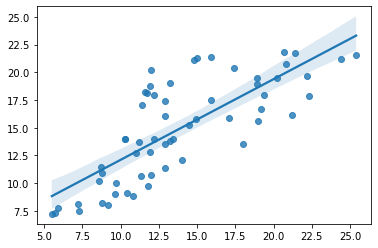

In [35]:
# se procede a plotear tambien lo valores de y_test y de Y_pred
sns.regplot(x=y_test,y=y_pred);

##### Modelo Utilizando Cross Validation

In [36]:
#Importamos las librerías necesarias
from sklearn.model_selection import cross_val_score

#Instanciamos la variable de la regresión

reg_cv= LinearRegression()

#Definimos las parametros para realizar la validacion cruzada

cv_scores= cross_val_score(reg_cv, v_feature, v_predecir, cv=5)

#Imprimimos los resultados de R2 obtenidos en cada una de las iteraciones
print('Resultados: {}'.format(cv_scores))

#Imprimimos la media de los resultados de R2
print('Puntaje promedio 5-fold CV: {}'.format(np.mean(cv_scores)))

Resultados: [0.59389377 0.68760015 0.56879602 0.64179881 0.47091168]
Puntaje promedio 5-fold CV: 0.5926000843648256


**Por lo tanto** El modelo nos revela que se tienen resultados satisfactorios y que puede ser utilizado para predecir valores futuros con un nuevo ingreso de datos.  

Que la TV muestra alta relación con Ventas, y es una variable elegida para las predicciones del modelo presentado, además que el valor R cuadrado se mantuvo cercano al 0.63.   